In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2 
import numpy as np
import os

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## VGG16 Architecture

5 layers of `(Padding, Convolution, Padding, Convolution, MaxPool)`, then a fully connected Dense layer, as shown below.

In [2]:
# define a VGG16 network

def VGG_16(weights_path=None):
    model = models.Sequential()
    model.add(layers.ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(128, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

    model.add(layers.Flatten())

    #top layer of the VGG net
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model

### Predicting Cats with VGG16 Network

In [3]:
os.path.expanduser("~")

'C:\\Users\\Amit Vikram Raj'

In [4]:
im = cv2.resize(cv2.imread('prediction_images/cat.jpg'), (224, 224)).astype(np.float32)
#im = im.transpose((2,0,1))
im = np.expand_dims(im, axis=0)

# Test pretrained model
path_file = "./saved_model/vgg16_weights_tf_dim_ordering_tf_kernels.h5"
model = VGG_16(path_file)
model.summary()

model.compile(optimizer='sgd',
              loss='categorical_crossentropy')

out = model.predict(im)
print(np.argmax(out))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 226, 226, 3)      0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_1 (ZeroPaddi  (None, 226, 226, 64)     0         
 ng2D)                                                           
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                        

`285` is returned with corresponds to "Egyptian cat".

Impressive, isn't it? Our VGG16 network can successfully recognize
images of catst.

## Using tf.keras built-in VGG16 net module

In [2]:
from tensorflow.keras.backend import clear_session
clear_session()

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16

# pre built model with pre-trained weights on imagenet
model = VGG16(weights='imagenet', include_top=True)

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy')

model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

1/1 [==============================] - 0s 22ms/step
820


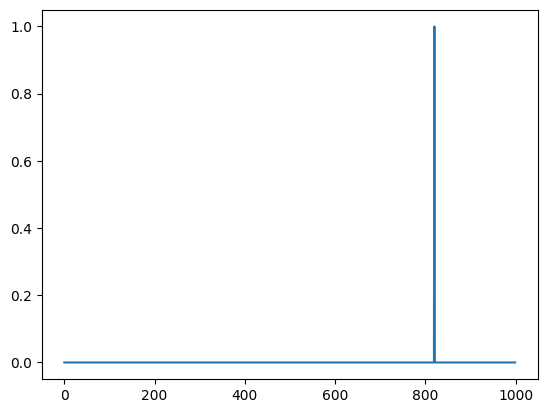

In [6]:
# resize into VGG16 trained images' format
im = cv2.resize(cv2.imread('prediction_images/steam-locomotive.jpg'), (224, 224))
im = np.expand_dims(im, axis=0)
im.astype(np.float32)

# predict
out = model.predict(im)
index = np.argmax(out)
print(index)

plt.plot(out.ravel())
plt.show();

# o/p --> 820 is for steaming train

## Recycling pre-built deep learning models for extracting features

One very simple idea is to use VGG 16, and more generally DCNN, for 
feature extraction. This code implements the idea by extracting feature 
from a specific layer.

In [1]:
import cv2
import numpy as np
from pprint import pprint

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, VGG16

from tensorflow.keras.backend import clear_session
clear_session()

In [2]:
# pre-build model with pre-trained weights on imagenet
base_model = VGG16(weights='imagenet', include_top=True)
print(base_model, "\n")

# All layers of VGG16
for i, layer in enumerate(base_model.layers):
    print(i, layer.name, layer.output_shape)


0 input_1 [(None, 224, 224, 3)]
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_pool (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
14 block4_pool (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
18 block5_pool (None, 7, 7, 512)
19 flatten (None, 25088)
20 fc1 (None, 4096)
21 fc2 (None, 4096)
22 predictions (None, 1000)


In [3]:
# Extract features from block4_pool block
model = models.Model(inputs = base_model.input, 
                     outputs = base_model.get_layer('block4_pool').output)

img_path = "prediction_images/cat.jpg"
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# get the features from this block
features = model.predict(x)
pprint(features)

1/1 [==============================] - 3s 3s/step
array([[[[  0.      ,   0.      ,  39.057278, ...,   0.      ,
            0.      ,   0.      ],
         [  0.      ,   0.      ,   0.      , ...,   0.      ,
          261.47574 ,   0.      ],
         [  0.      ,   0.      ,   0.      , ...,   0.      ,
          376.41232 ,   0.      ],
         ...,
         [  0.      ,   0.      ,   0.      , ...,   0.      ,
          175.45848 ,   0.      ],
         [  0.      ,   0.      ,  32.01233 , ...,   0.      ,
            0.      ,   0.      ],
         [  0.      ,   0.      ,  76.265816, ...,   0.      ,
            0.      ,   0.      ]],

        [[  0.      ,   0.      ,   0.      , ...,   0.      ,
           50.82755 ,   0.      ],
         [  0.      ,   0.      ,  44.37474 , ...,   0.      ,
          123.88842 ,   0.      ],
         [  0.      ,   0.      ,  27.84265 , ...,   0.      ,
          573.3558  ,   0.      ],
         ...,
         [  0.      ,   0.      ,   0.

In [4]:
features.shape

(1, 14, 14, 512)

You might wonder **why we want to extract the features from an intermediate layer in a DCNN?**

- The reasoning is that as the network learns to classify images into categories, each layer learns to identify the features that are necessary to perform the final classification.

    - **Lower layers identify lower-order features such as color and edges,** and 
        
    - **higher layers compose these lower-order features into higher-order features such as shapes or objects.** 
        
    - **Hence, the intermediate layer has the capability to extract important features from an image, and these features are more likely to help in different kinds of classification.** 

* **

This has multiple advantages: 

- First, we can rely on publicly available large-scale training and transfer this learning to novel domains. 

- Second, we can save time on expensive training. 

- Third, we can provide reasonable solutions even when we don't have a large number of training examples for our domain.

- We also get a good starting network shape for the task at hand, instead of guessing it. 

With this, we will conclude the overview of VGG16 CNNs, the last deep learning model defined in this chapter.